/home/pavel/dev/bigdata/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


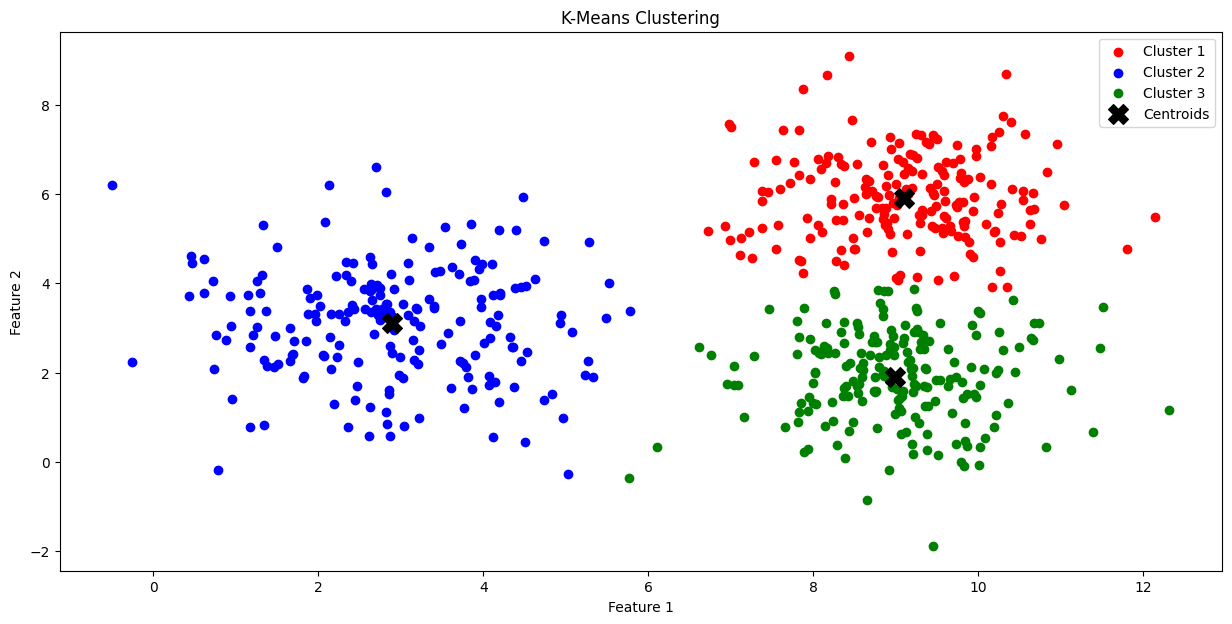

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [15, 7]

# Задаем параметры нормальных распределений
centers = np.array([[3, 3], [9, 2], [9, 6]])
covariances = np.array([[[1.5,0], [0, 1.5]],
                        [[1, 0], [0, 1]],
                        [[1, 0], [0, 1]]])


# np.random.seed(42)  
data = []
for i in range(len(centers)):
    data.append(np.random.multivariate_normal(centers[i], covariances[i], 200))
data = np.concatenate(data)


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data)

# Разделение данных по кластерам
cluster1 = data[labels == 0]
cluster2 = data[labels == 1]
cluster3 = data[labels == 2]


plt.scatter(cluster1[:, 0], cluster1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], c='blue', label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# K ближайших соседей
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Наивный байесовский метод
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Оценка производительности моделей
knn_accuracy = accuracy_score(y_test, knn_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")

knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
pd.DataFrame(knn_conf_matrix)

KNN Accuracy: 0.9916666666666667
Naive Bayes Accuracy: 0.9916666666666667


,0,1,2
0,42,0,0
1,0,43,0
2,0,1,34
